In [1]:
# Import bibliotek
from urllib.request import urlopen
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Instalacja modelu spacy do przetwarzania języka polskiego
!python3 -m spacy download pl_core_news_md

In [3]:
# Załadowanie modelu
nlp = spacy.load("pl_core_news_md") 

In [4]:
# Funkcja do pobierania książek

def book(url):
    return urlopen(url).read().decode("utf8")

## Punkt 1. Utworzyć korpus dokumentów na podstawie 5-10 książek pobranych ze strony Wolne Lektury: https://wolnelektury.pl/

In [5]:
malyKsiaze = book('https://wolnelektury.pl/media/book/txt/saint-exupery-maly-ksiaze.txt')
dziady2 = book('https://wolnelektury.pl/media/book/txt/dziady-dziady-poema-dziady-czesc-ii.txt')
dziady3 = book('https://wolnelektury.pl/media/book/txt/dziady-dziady-poema-dziady-czesc-iii.txt')
ogniemIMieczemT1 = book('https://wolnelektury.pl/media/book/txt/ogniem-i-mieczem-tom-pierwszy.txt')
ogniemIMieczemT2 = book('https://wolnelektury.pl/media/book/txt/ogniem-i-mieczem-tom-drugi.txt')

In [6]:
# Wprowadzenie tokenizera
def tokenizer(document):

    return [word.text.lower() for word in nlp(document) if word.text not in 
            '\n\r\t!"-—#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~' and word.text.isalpha()]

**Notatki:**
https://www.w3schools.com/python/ref_string_isalpha.asp , funkcja isalpha() sprawdza, czy string jest tekstem niezawierającym niczego innego, na przykład dla tekstu z cyframi zwróci false

In [7]:
malyKsiaze_tokenized_string = " ".join(tokenizer(malyKsiaze))
dziady2_tokenized_string = " ".join(tokenizer(dziady2))
dziady3_tokenized_string = " ".join(tokenizer(dziady3))
ogniemIMieczemT1_tokenized_string = " ".join(tokenizer(ogniemIMieczemT1))
ogniemIMieczemT2_tokenized_string = " ".join(tokenizer(ogniemIMieczemT2))

In [8]:
malyKsiaze_nlp = nlp(malyKsiaze_tokenized_string)
dziady2_nlp = nlp(dziady2_tokenized_string)
dziady3_nlp = nlp(dziady3_tokenized_string)
ogniemIMieczemT1_nlp = nlp(ogniemIMieczemT1_tokenized_string)
ogniemIMieczemT2_nlp = nlp(ogniemIMieczemT2_tokenized_string)

**Notatki:**
https://spacy.io/api/attributes attrs.POS - POS jest atrybutem określającym uniwersalne częsci mowy

**Notatki** przy tworzeniu poniższej funkcji skorzystałem z nastepujących źródeł:
https://stackoverflow.com/questions/4183506/python-list-sort-in-descending-order ( reverse=True, przy funkcji sorted() )
https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value (sortowanie po wartościach)

## Punkt 2.2 Dla każdej pozycji zwizualizować częstość występowania części mowy

In [9]:
# zliczone zostaje ile jest słów danego typu POS (części mowy) w każdej z książek
malyKsiazePoS = malyKsiaze_nlp.count_by(spacy.attrs.POS)
dziady2PoS = dziady2_nlp.count_by(spacy.attrs.POS)
dziady3PoS = dziady3_nlp.count_by(spacy.attrs.POS)
ogniemIMieczemT1PoS = ogniemIMieczemT1_nlp.count_by(spacy.attrs.POS)
ogniemIMieczemT2PoS = ogniemIMieczemT2_nlp.count_by(spacy.attrs.POS)

In [14]:
# Definiuję funkcję, która będzie wizualizować częstość występowania części mowy
def PartOfSpeechVisualization(book,bookPoS):
  dict_temp = {}
  for k,v in bookPoS.items(): # k to indeks części mowy, v to ilość słów o danym indeksie
          print(book.vocab[k].text + " " + str(v))# za pomocą book.vocab[k].text dostajemy się do symbolu częsci mowy
          dict_temp[book.vocab[k].text] = v

  dict_temp_sorted = dict(sorted(dict_temp.items(), key=lambda item: item[1],reverse=True)) # sortowanie po częstości występowania danej części mowy

  print("=======================")

  data = {'Part of Speech': dict_temp_sorted.keys(), 
          'Counts': dict_temp_sorted.values() }

  df = pd.DataFrame(data)
  df.plot(kind='bar',x='Part of Speech',y='Counts')

Zwizualizowanie częstości występowania części mowy dla książki: Mały Książę 

PROPN 100
X 27
NOUN 2601
ADJ 1048
VERB 2215
SCONJ 391
PRON 1265
DET 533
AUX 464
ADP 1049
PART 656
ADV 756
CCONJ 505
NUM 124
INTJ 6


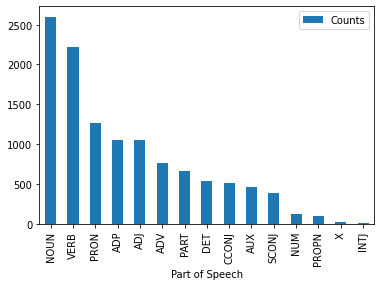

In [15]:
print('Zwizualizowanie częstości występowania części mowy dla książki: Mały Książę \n')
PartOfSpeechVisualization(malyKsiaze_nlp,malyKsiazePoS)

Zwizualizowanie częstości występowania części mowy dla książki: Dziady II 

VERB 500
PROPN 34
PRON 283
NUM 10
NOUN 1071
X 36
AUX 105
ADJ 263
ADV 190
ADP 383
DET 99
CCONJ 196
SCONJ 83
PART 165
INTJ 5


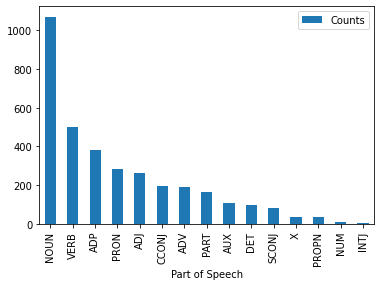

In [16]:
print('Zwizualizowanie częstości występowania części mowy dla książki: Dziady II \n')
PartOfSpeechVisualization(dziady2_nlp,dziady2PoS)

Zwizualizowanie częstości występowania części mowy dla książki: Dziady III 

VERB 3511
PROPN 493
PRON 1851
NUM 71
NOUN 5687
ADJ 1653
ADP 1879
ADV 937
CCONJ 949
DET 767
PART 774
AUX 381
SCONJ 565
SYM 3
X 309
PUNCT 3
INTJ 37
SPACE 2


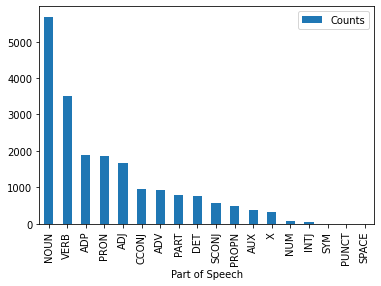

In [17]:
print('Zwizualizowanie częstości występowania części mowy dla książki: Dziady III \n')
PartOfSpeechVisualization(dziady3_nlp,dziady3PoS)

Zwizualizowanie częstości występowania części mowy dla książki: Ogniem I Mieczem Tom I 

PROPN 1940
NOUN 31402
CCONJ 7640
AUX 2739
ADJ 11838
ADP 13495
DET 4018
VERB 20661
ADV 6228
SCONJ 4182
PRON 10668
PART 6163
NUM 499
X 237
INTJ 84
SPACE 4
PUNCT 4
SYM 2


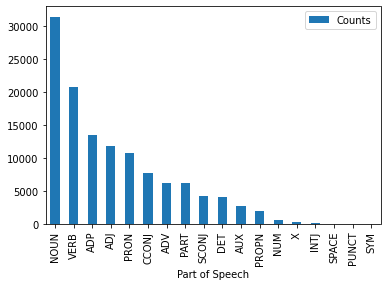

In [18]:
print('Zwizualizowanie częstości występowania części mowy dla książki: Ogniem I Mieczem Tom I \n')
PartOfSpeechVisualization(ogniemIMieczemT1_nlp,ogniemIMieczemT1PoS)

Zwizualizowanie częstości występowania części mowy dla książki: Ogniem I Mieczem Tom II 

PROPN 2062
NOUN 28737
CCONJ 7403
X 231
DET 3728
ADJ 10829
ADP 12736
VERB 20731
PRON 11447
ADV 6120
PART 6210
NUM 504
SCONJ 4307
AUX 2670
INTJ 78
PUNCT 5
SPACE 2
SYM 4


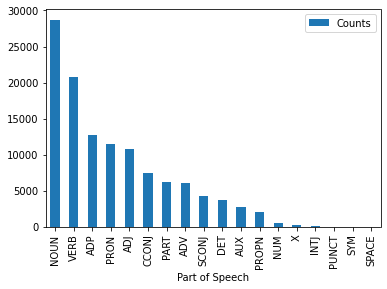

In [19]:
print('Zwizualizowanie częstości występowania części mowy dla książki: Ogniem I Mieczem Tom II \n')
PartOfSpeechVisualization(ogniemIMieczemT2_nlp,ogniemIMieczemT2PoS)

## Punkt 2.1 Dla każdej pozycji zwizualizować częstość występowania klas gramatycznych

In [20]:
malyKsiazeTAG = malyKsiaze_nlp.count_by(spacy.attrs.TAG)
dziady2TAG = dziady2_nlp.count_by(spacy.attrs.TAG)
dziady3TAG = dziady3_nlp.count_by(spacy.attrs.TAG)
ogniemIMieczemT1TAG = ogniemIMieczemT1_nlp.count_by(spacy.attrs.TAG)
ogniemIMieczemT2TAG = ogniemIMieczemT2_nlp.count_by(spacy.attrs.TAG)

In [21]:
# Definiuję funkcję, która będzie wizualizować częstość występowania klas gramatycznych
def TAGVisualization(book,bookTAG):
  dict_temp = {}
  for k,v in bookTAG.items():
          print(book.vocab[k].text + " " + str(v))
          dict_temp[book.vocab[k].text] = v
  dict_temp_sorted = dict(sorted(dict_temp.items(), key=lambda item: item[1],reverse=True))
  data = {'TAG': dict_temp_sorted.keys(), 
          'Counts':  dict_temp_sorted.values()}
  
  df = pd.DataFrame(data)
  df.plot(kind='bar',x='TAG',y='Counts',color='green')

Zwizualizowanie częstości występowania klas gramatycznych dla książki: Mały Książę 

SUBST 3073
ADJ 1452
FIN 940
COMP 280
PPRON12 270
PRAET 1046
PRED 113
PREP 1056
QUB 1026
INF 321
ADV 780
CONJ 554
NUM 171
PPRON3 237
PPAS 70
IMPS 9
GER 40
PACT 18
IMPT 75
ADJP 16
PCON 32
SIEBIE 53
BEDZIE 62
INTERJ 31
ADJC 3
BURK 2
WINIEN 4
INTERP 1
PANT 1
XXX 2
AGLT 1
BREV 1


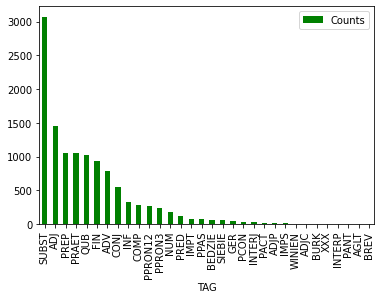

In [22]:
print('Zwizualizowanie częstości występowania klas gramatycznych dla książki: Mały Książę \n')
TAGVisualization(malyKsiaze_nlp,malyKsiazeTAG)

Zwizualizowanie częstości występowania klas gramatycznych dla książki: Dziady II 

SUBST 1225
ADJ 312
FIN 315
PRED 34
PPAS 28
ADV 204
PREP 384
NUM 12
CONJ 200
PRAET 83
QUB 228
COMP 43
INF 49
GER 7
PACT 2
XXX 27
BEDZIE 26
IMPT 63
PPRON3 30
PPRON12 82
INTERJ 33
NUMCOL 1
SIEBIE 12
BURK 1
ADJC 1
PANT 2
ADJP 5
PCON 9
AGLT 1
IMPS 3
_SP 1


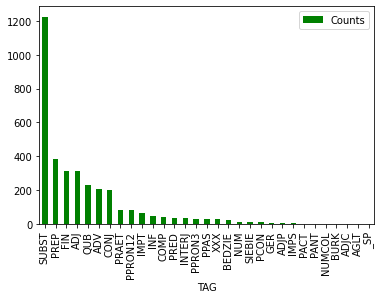

In [23]:
print('Zwizualizowanie częstości występowania klas gramatycznych dla książki: Dziady II \n')
TAGVisualization(dziady2_nlp,dziady2TAG)

Zwizualizowanie częstości występowania klas gramatycznych dla książki: Dziady III 

SUBST 6546
ADJ 2141
PREP 1890
ADJP 16
FIN 1805
NUM 144
ADV 1054
CONJ 980
GER 71
QUB 1185
PRAET 913
COMP 300
PPAS 130
INF 391
IMPS 66
PPRON3 495
PACT 41
PCON 76
BEDZIE 65
PPRON12 580
SIEBIE 41
BREV 84
IMPT 262
INTERJ 112
AGLT 6
XXX 329
PRED 113
BURK 7
PANT 6
WINIEN 4
NUMCOL 2
ADJC 6
DEPR 8
INTERP 2
_SP 1


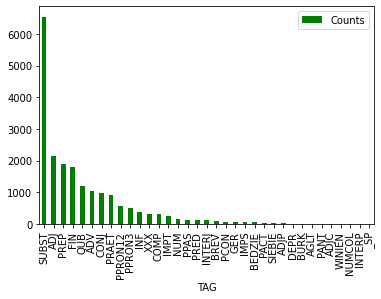

In [24]:
print('Zwizualizowanie częstości występowania klas gramatycznych dla książki: Dziady III \n')
TAGVisualization(dziady3_nlp,dziady3TAG)

Zwizualizowanie częstości występowania klas gramatycznych dla książki: Ogniem I Mieczem Tom I 

SUBST 35555
CONJ 8575
PRAET 11742
PRED 701
ADJ 13573
PREP 13532
QUB 10059
FIN 4914
COMP 2627
ADV 6474
IMPS 331
PPAS 1252
PACT 470
INF 2882
PCON 688
NUM 801
GER 483
ADJP 124
PPRON3 3018
PANT 345
SIEBIE 333
IMPT 593
INTERJ 185
BURK 36
BEDZIE 328
PPRON12 1860
ADJC 34
AGLT 54
WINIEN 30
BREV 20
XXX 158
NUMCOL 10
DEPR 14
ADJA 1
INTERP 1
_SP 1


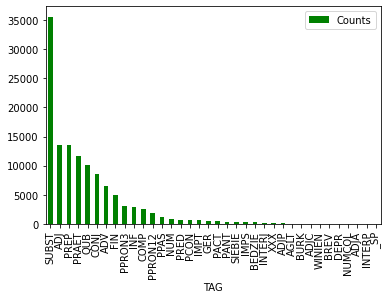

In [25]:
print('Zwizualizowanie częstości występowania klas gramatycznych dla książki: Ogniem I Mieczem Tom I \n')
TAGVisualization(ogniemIMieczemT1_nlp,ogniemIMieczemT1TAG)

Zwizualizowanie częstości występowania klas gramatycznych dla książki: Ogniem I Mieczem Tom II 

SUBST 33236
CONJ 8192
ADJ 12398
PREP 12786
PRAET 11804
QUB 10082
PPAS 1007
NUM 834
ADV 6599
GER 385
COMP 2841
SIEBIE 296
INF 2659
PCON 652
PPRON3 3182
PANT 253
PRED 649
PACT 401
PPRON12 2429
IMPS 286
ADJP 121
BEDZIE 340
FIN 5247
INTERJ 152
IMPT 668
XXX 105
BURK 38
DEPR 18
AGLT 55
WINIEN 26
ADJC 36
NUMCOL 20
BREV 6
_SP 1


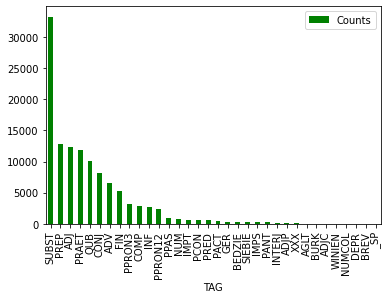

In [26]:
print('Zwizualizowanie częstości występowania klas gramatycznych dla książki: Ogniem I Mieczem Tom II \n')
TAGVisualization(ogniemIMieczemT2_nlp,ogniemIMieczemT2TAG)

## Punkt 3 Na podstawie korpusu zbudowanego z 5 dowolnych książek pobranych ze strony Wolne Lektury wyznaczyć i zwizualizować częstność występowania rzeczowników sprowadzonych do form podstawowych

In [27]:
# Definiuję funkcję, która będzie wizualizować częstość występowania rzeczowników sprowadzonych do form podstawowych
def nounsFrequencyVisualization(book):
  nounsFrequency = {}
  #lemma_ to lemat
  for t in book:
     if t.pos_=='NOUN':
       count = nounsFrequency.get(t.lemma_,0) # jeśli danego słowa nie ma w słowniku nounsFrequency to count = 0, jeśli jest to pobierz ze słownika wartość dla tego słowa
       nounsFrequency[t.lemma_] = count + 1

  print(nounsFrequency)

  nounsFrequency_sorted = dict(sorted(nounsFrequency.items(), key=lambda item: item[1],reverse=True))
  data = {'Noun': nounsFrequency_sorted.keys(), 
          'Counts':  nounsFrequency_sorted.values()}
  
  df = pd.DataFrame(data)
  df.head(25).plot(kind='bar',x='Noun',y='Counts',color='green')

Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Mały Książę 

{'saint': 2, 'książę': 166, 'tłum': 2, 'Agata': 1, 'kozak': 2, 'isbn': 2, 'leon': 2, 'werth': 2, 'dziecko': 13, 'książka': 11, 'usprawiedliwienie': 2, 'przyjaciel': 22, 'świat': 11, 'usprawiedliwić': 1, 'głód': 2, 'chłód': 1, 'pociecha': 2, 'powód': 9, 'dedykacja': 1, 'czas': 32, 'chłopiec': 6, 'rok': 21, 'raz': 42, 'obrazek': 1, 'dżunc': 1, 'historia': 9, 'wąż': 18, 'bo': 12, 'lwa': 1, 'kopia': 1, 'rysunek': 18, 'węże': 1, 'zdobycz': 1, 'całość': 1, 'przeżuwać': 1, 'sen': 5, 'przygoda': 1, 'dżungli': 2, 'koniec': 9, 'kredka': 1, 'numer': 8, 'arcydzieło': 1, 'kapelusz': 8, 'słoń': 5, 'wnętrze': 1, 'boa': 1, 'dorośly': 2, 'dorośl': 6, 'rysowanie': 1, 'węży': 1, 'geografia': 3, 'rachunka': 1, 'gramatyka': 2, 'sposób': 5, 'wiek': 3, 'kariera': 2, 'niepowodzenie': 1, 'dorosły': 5, 'zawód': 3, 'samolot': 9, 'rzut': 1, 'oko': 12, 'chin': 1, 'arizon': 1, 'człowiek': 34, 'środek': 

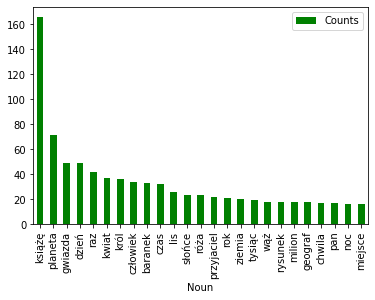

In [29]:
print('Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Mały Książę \n')
nounsFrequencyVisualization(malyKsiaze_nlp )

Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Dziady II 

{'dziada': 8, 'część': 2, 'nazwisko': 1, 'uroczystość': 3, 'pospólstw': 1, 'powiat': 1, 'litwa': 1, 'kurlandia': 1, 'pamiątka': 2, 'dziad': 1, 'ogólność': 1, 'przodek': 1, 'początek': 1, 'zasięgać': 1, 'czas': 6, 'uczta': 2, 'kozioł': 1, 'koźlarz': 1, 'guślarz': 38, 'kapłan': 1, 'poeta': 1, 'gęślarz': 1, 'światłe': 1, 'duchowieństwo': 1, 'właściciel': 1, 'zwyczaj': 2, 'praktyka': 1, 'zbytkiem': 2, 'pospólstwo': 2, 'święty': 1, 'tajemnia': 1, 'kaplic': 1, 'dom': 1, 'cmentarz': 3, 'trunek': 1, 'owoc': 7, 'dusza': 9, 'nieboszczyk': 2, 'uwaga': 1, 'częstować': 1, 'zmarły': 1, 'lud': 2, 'grecja': 1, 'wschód': 3, 'wyspa': 1, 'świat': 7, 'obrzęd': 3, 'wyobrażenie': 1, 'religia': 1, 'dzień': 3, 'potraew': 1, 'napój': 10, 'śpiewa': 1, 'ulga': 1, 'dusz': 1, 'cel': 1, 'święto': 1, 'miejsce': 1, 'imaginacja': 1, 'bajka': 1, 'powieść': 1, 'pieśń': 2, 'nieboszczykach': 1, 'prośba': 10, 'pr

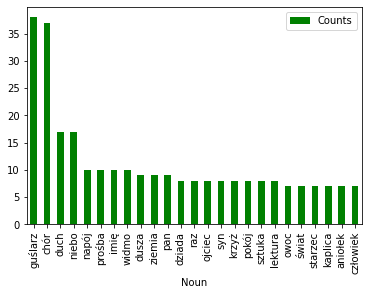

In [30]:
print('Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Dziady II \n')
nounsFrequencyVisualization(dziady2_nlp )

Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Dziady III 

{'dziada': 5, 'część': 6, 'pamięć': 8, 'jan': 4, 'cyprian': 1, 'daszkiewicz': 1, 'feliks': 8, 'spółucznia': 1, 'spółwięźnie': 1, 'spółwygnańca': 1, 'miłość': 8, 'ojczyzna': 9, 'tęsknota': 1, 'archangielsk': 1, 'petersburg': 1, 'sprawa': 12, 'męczennik': 2, 'autor': 4, 'wiek': 12, 'widok': 3, 'strona': 30, 'okrucieństwo': 2, 'tyran': 4, 'poświęceć': 1, 'lud': 25, 'wytrwałość': 1, 'przykład': 6, 'czas': 19, 'prześladowania': 1, 'chrześcijaństwo': 1, 'królowi': 3, 'przeczucie': 1, 'zjawieć': 1, 'światło': 3, 'ziemia': 33, 'upadek': 1, 'odrodzeć': 1, 'zmartwychwstano': 1, 'pokolenie': 11, 'mnóstwo': 4, 'ofiara': 5, 'scena': 15, 'kraj': 4, 'rys': 1, 'obraz': 3, 'wypadek': 4, 'prześladowanie': 1, 'imperator': 5, 'rok': 33, 'polityka': 1, 'wolność': 5, 'kierunek': 1, 'ród': 2, 'prześladować': 2, 'dzieje': 5, 'senator': 122, 'nienawiść': 3, 'rząd': 10, 'polakom': 1, 'podstawa': 2, '

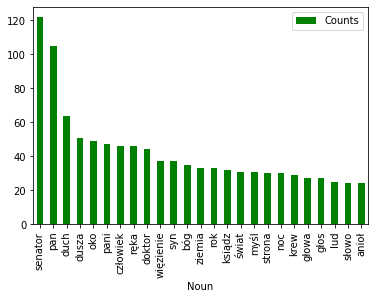

In [31]:
print('Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Dziady III \n')
nounsFrequencyVisualization(dziady3_nlp )

Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Ogniem I Mieczem Tom I 

{'ogień': 79, 'miecz': 51, 'isbn': 2, 'Tom': 2, 'rozdział': 34, 'rok': 44, 'znak': 28, 'niebo': 64, 'ziemia': 97, 'klęska': 29, 'zdarzenie': 2, 'kronikarz': 2, 'wiosna': 11, 'ilość': 3, 'pole': 60, 'zasiewa': 1, 'trawa': 18, 'przepowiedni': 1, 'napad': 17, 'lato': 6, 'zaćmienie': 1, 'słońce': 47, 'kometa': 2, 'miasto': 80, 'mogiła': 18, 'krzyż': 22, 'obłok': 4, 'post': 2, 'zaraza': 3, 'kraj': 51, 'rodzaj': 8, 'zima': 11, 'człowiek': 278, 'województw': 6, 'lód': 2, 'woda': 119, 'ranek': 4, 'śnieg': 5, 'łożysk': 1, 'brzeg': 94, 'deszcz': 18, 'step': 82, 'kałuża': 2, 'południe': 14, 'województwo': 8, 'ruń': 3, 'rozłoga': 30, 'połowa': 27, 'grudzień': 1, 'rój': 4, 'pasiek': 2, 'bydło': 14, 'zagrod': 1, 'porządek': 12, 'przyrodzenie': 2, 'rusi': 9, 'umysł': 16, 'oko': 311, 'polom': 1, 'niebezpieczeństwo': 21, 'walka': 42, 'potyczka': 1, 'orły': 2, 'jastrząb': 4, 'kruk

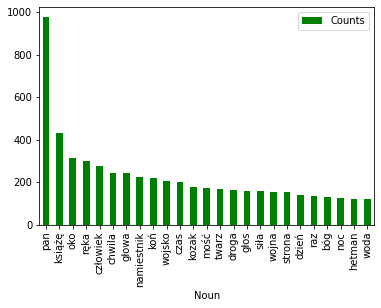

In [32]:
print('Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Ogniem I Mieczem Tom I \n')
nounsFrequencyVisualization(ogniemIMieczemT1_nlp )

Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Ogniem I Mieczem Tom II 

{'ogień': 69, 'miecz': 26, 'isbn': 2, 'Tom': 1, 'rozdział': 30, 'noc': 134, 'brzeg': 38, 'waładynka': 11, 'kierunek': 3, 'dniestr': 13, 'orszak': 15, 'jeźdźc': 9, 'człowiek': 194, 'noga': 104, 'przedzie': 7, 'krok': 55, 'straż': 40, 'strażować': 1, 'czujność': 3, 'powód': 13, 'czas': 267, 'baczenie': 2, 'okolica': 27, 'chwila': 265, 'koń': 202, 'reszta': 28, 'koniec': 130, 'wzgórze': 11, 'cien': 2, 'przestwór': 1, 'światło': 52, 'księżyc': 27, 'ostrożność': 6, 'pochód': 13, 'środek': 25, 'siodełka': 1, 'kołyska': 6, 'kołysce': 2, 'postać': 31, 'promień': 17, 'twarz': 155, 'oko': 293, 'spis': 16, 'proporc': 2, 'kozak': 133, 'inny': 31, 'luz': 1, 'przed': 5, 'uwaga': 18, 'trwożliwie': 1, 'strona': 132, 'pustyni': 1, 'cisza': 29, 'uderzenie': 6, 'kopyta': 8, 'wołać': 1, 'przeda': 1, 'przestroga': 1, 'towarzysz': 52, 'horpyn': 4, 'horpyna': 36, 'istota': 8, 'kozacko

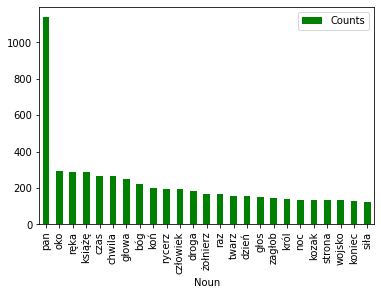

In [33]:
print('Zwizualizowanie częstości występowania rzeczowników sprowadzonych do form podstawowych dla książki: Ogniem I Mieczem Tom II \n')
nounsFrequencyVisualization(ogniemIMieczemT2_nlp )

In [34]:
# Zapisuję pod zmiennymi wszystkie rzeczowniki sprowadzone do form podstawowych
def getNounsLemmaList(book):
  tab = []
  for t in book:
    if t.pos_ == 'NOUN':
      tab.append(t.lemma_)
  return tab

malyKsiaze_nouns = getNounsLemmaList(malyKsiaze_nlp)
dziady2_nouns = getNounsLemmaList(dziady2_nlp)
dziady3_nouns = getNounsLemmaList(dziady3_nlp)
ogniemIMieczemT1_nouns = getNounsLemmaList(ogniemIMieczemT1_nlp)
ogniemIMieczemT2_nouns = getNounsLemmaList(ogniemIMieczemT2_nlp)

In [35]:
# Tworzę korpus dokumentów ( [[rzeczowniki książki 1],[rzeczowniki książki2],...])
korpus = []
korpus.append(malyKsiaze_nouns)
korpus.append(dziady2_nouns)
korpus.append(dziady3_nouns)
korpus.append(ogniemIMieczemT1_nouns)
korpus.append(ogniemIMieczemT2_nouns)

In [36]:
# Tworzę korpus dokumentów innego formatu ( ['rzeczownik nr.1 ksiazki 1 rzeczownik nr.2 ksiazki 1 ...' ,'rzeczownik nr.1 ksiazki 2, ...',...  ])
korpus2 = []
for noun in korpus:
  noun = ' '.join(noun)
  korpus2.append(noun)

In [37]:
# Tworzę stoplistę
stopwords = tokenizer(urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode("utf8"))


In [38]:
# Tworzę macierz TfIDF i ją wyświetlam
tfidf = TfidfVectorizer(smooth_idf=False, stop_words=stopwords)
tfs = tfidf.fit_transform(korpus2)
tfs.todense()
#tfs.toarray() - można też tak

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00150443, 0.01353984, 0.00220961, ..., 0.0011048 , 0.00331441,
         0.00150443],
        [0.        , 0.        , 0.003572  , ..., 0.00119067, 0.003572  ,
         0.        ]])

**Notatki:**  Macierz składa się z tylu list, ile jest dokumentów w korpusie, jedna lista składa się z tylu wartości ile jest wszystkich słów we wszystkich dokumentach [liczba dokumentów x liczba_słów]

## Punkt 4. Na podstawie częstości wyznaczonych powyżej zbudować macierz TF-IDF, wyłącznie w oparciu o rzeczowniki w formie podstawowej i każdą pozycję zwizualizować w postaci chmury tagów (wordcloud).

In [40]:
# Pomysł na poniższe operacje jest następujący: mam macierz tfIDF, chcę przedstawić chmurę tagów wyświetlającą najczęściej występujące rzeczowniki w formie podstawowej,
# natomiast częstość ta ma być 'skalibrowana' względem macierzy TfIDF. Przechodzę więc kolejno przez macierz TfIDF, pobieram wartość częstości występowania dla danego słowa,
# częstość wyrażona jest jako pewna wartość po przecinku, mnożę ją przez 100 i zmieniam na int - nie mogę mieć części dziesiętnej słowa.
# Tworzę nowy korpus dokumentów, w których liczba wystąpień danego rzeczownika jest wprostproporcjonalna do wartości uzyskanej w macierzy TfIDF
# Następnie będę wizualizował słowa jako chmurę tagów

feature_names = tfidf.get_feature_names_out() # pobranie wszystkich nazw kolumn macierzy tfidf (tutaj wszystkie słowa w korpusie składającym się ze wszystkich książek)

top_words_korpus = []
for i in tfs.toarray():
  top_words = []
  feature_names_index = 0
  for j in i: # iteracja po kolejnych wartosciach listy w liscie (najpierw lecimy po wartosciach dla wszystkich slow korpusu wyznaczonych dla ksiazki pierwszej)
    for k in range(int(j*100)): # wartości w macierzy tfidf to zazwyczaj wartości dziesiętne, setne, tysięczne, a nie możemy mieć setnej ilości słowa, więc mnożę przez 100 (dokonuję pewnego rodzaju normalizacji)
      top_words.append(feature_names[feature_names_index])
    feature_names_index = feature_names_index +1
  top_words_korpus.append(top_words)

In [41]:
# tutaj zmiana formatu słow znajdujących się w korpusie 
top_words_korpus2 = []
for noun in top_words_korpus:
  noun = ' '.join(noun)
  top_words_korpus2.append(noun)

In [42]:
def plotCloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

 Wizualizacja chmury tagów dla książki : Mały Książę


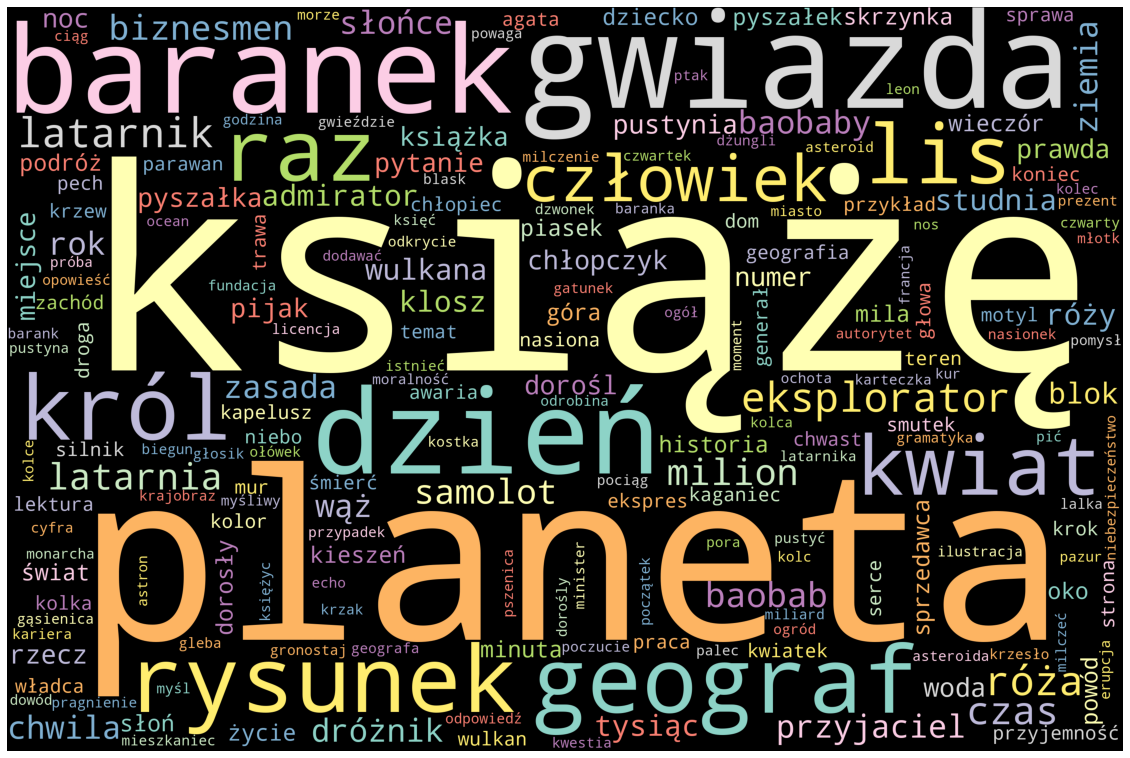

In [43]:
print(" Wizualizacja chmury tagów dla książki : Mały Książę")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(top_words_korpus2[0])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Mały Książę


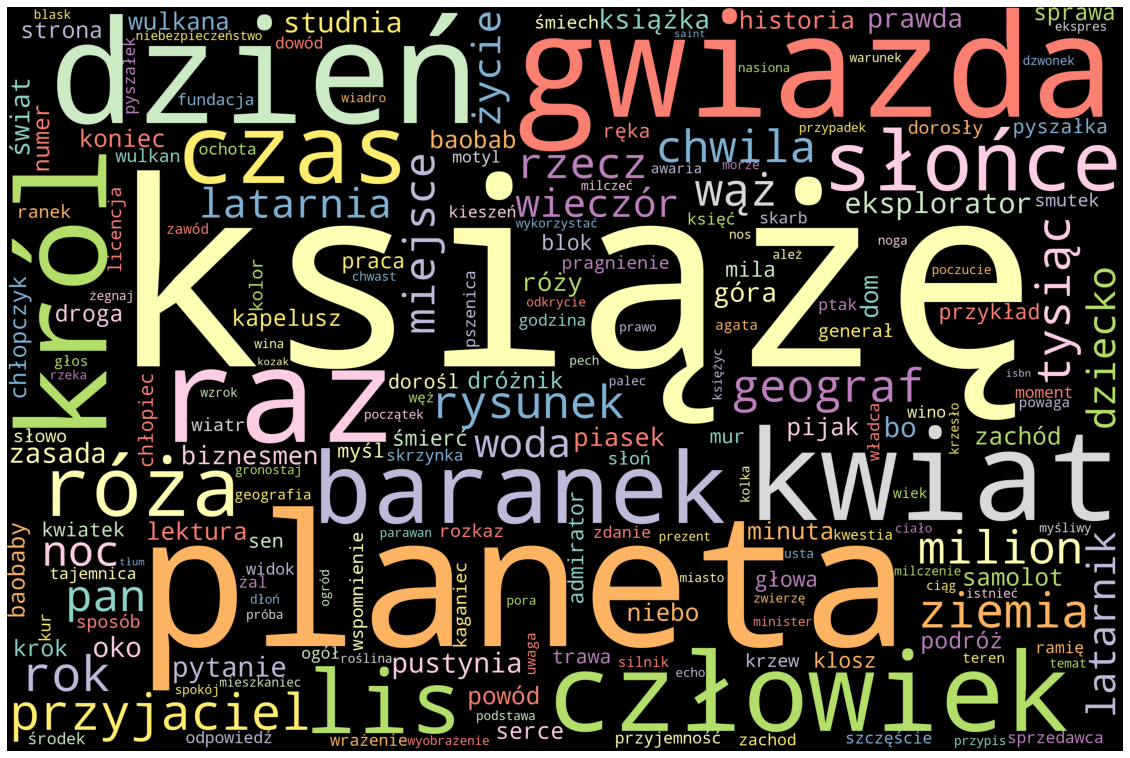

In [44]:
#bez macierzy tfidf
print(" Wizualizacja chmury tagów dla książki : Mały Książę")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(korpus2[0])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Dziady II


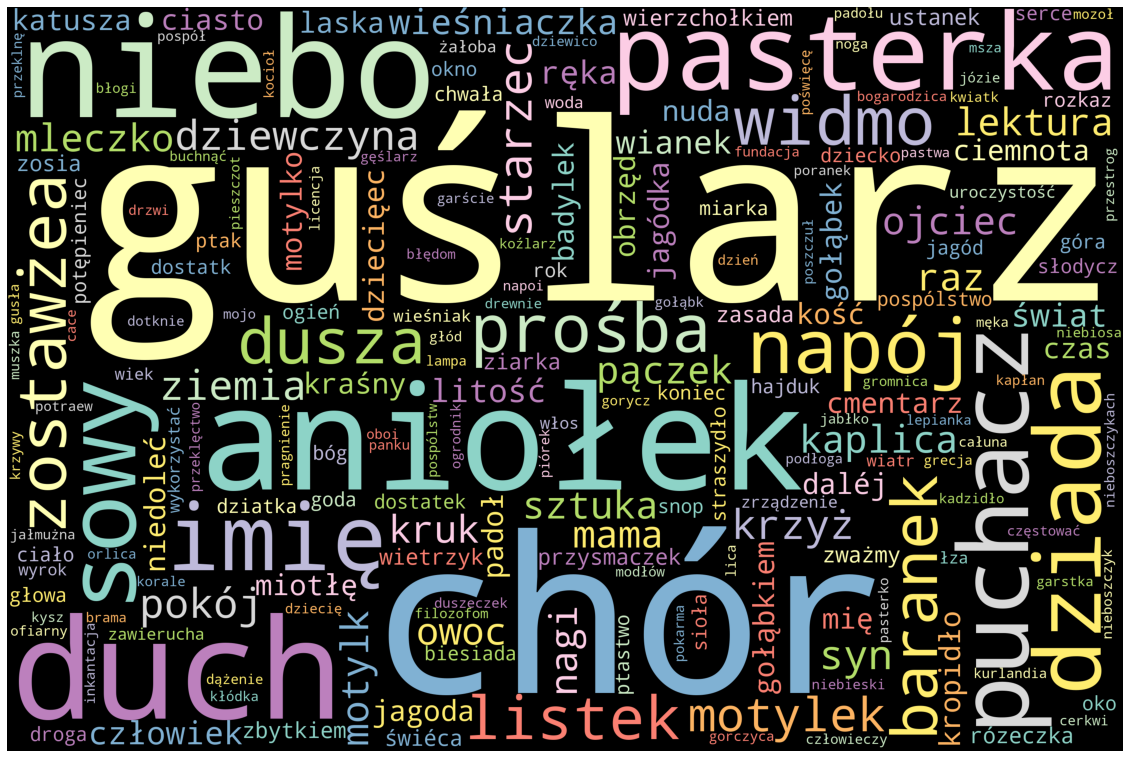

In [45]:
print(" Wizualizacja chmury tagów dla książki : Dziady II")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(top_words_korpus2[1])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Dziady II


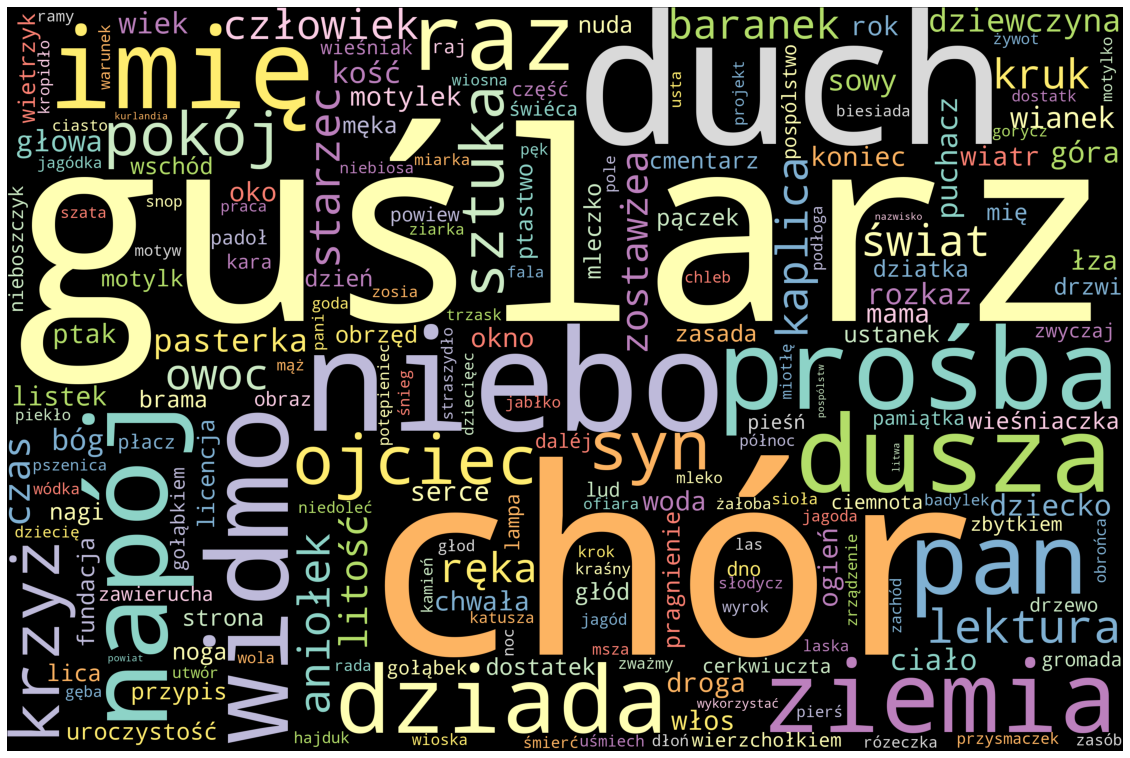

In [70]:
#bez macierzy tfidf
print(" Wizualizacja chmury tagów dla książki : Dziady II")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(korpus2[1])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Dziady III


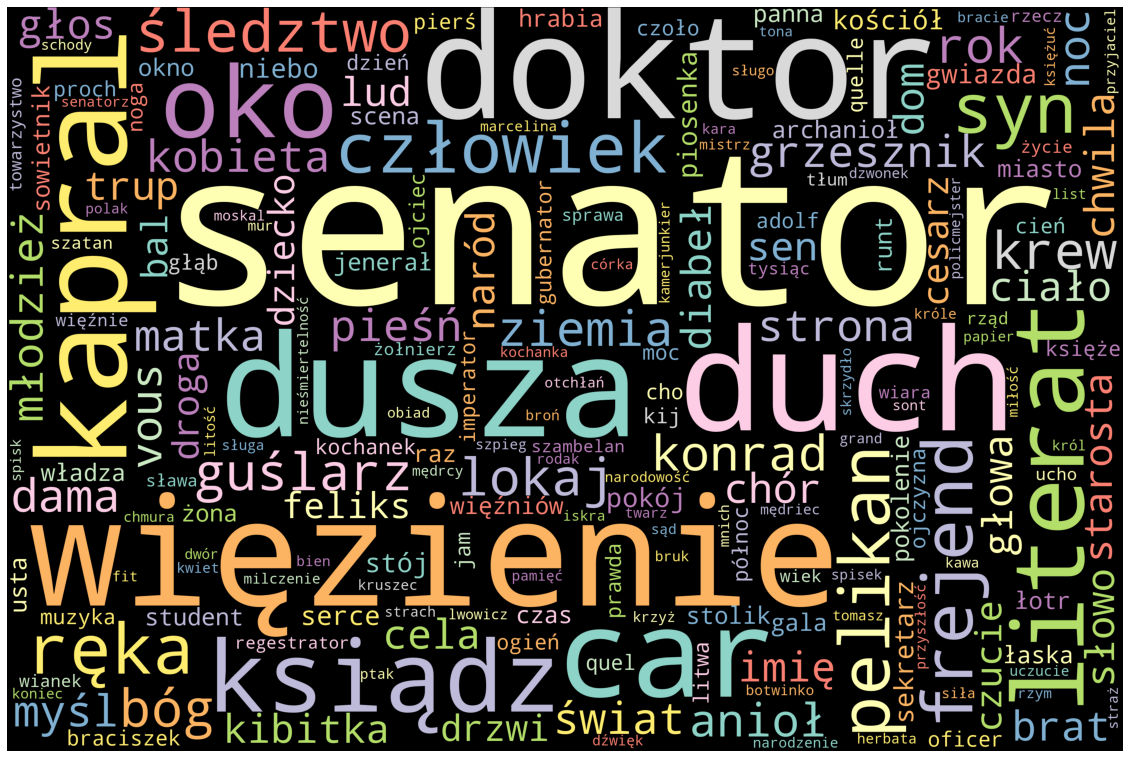

In [47]:
print(" Wizualizacja chmury tagów dla książki : Dziady III")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(top_words_korpus2[2])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Dziady III


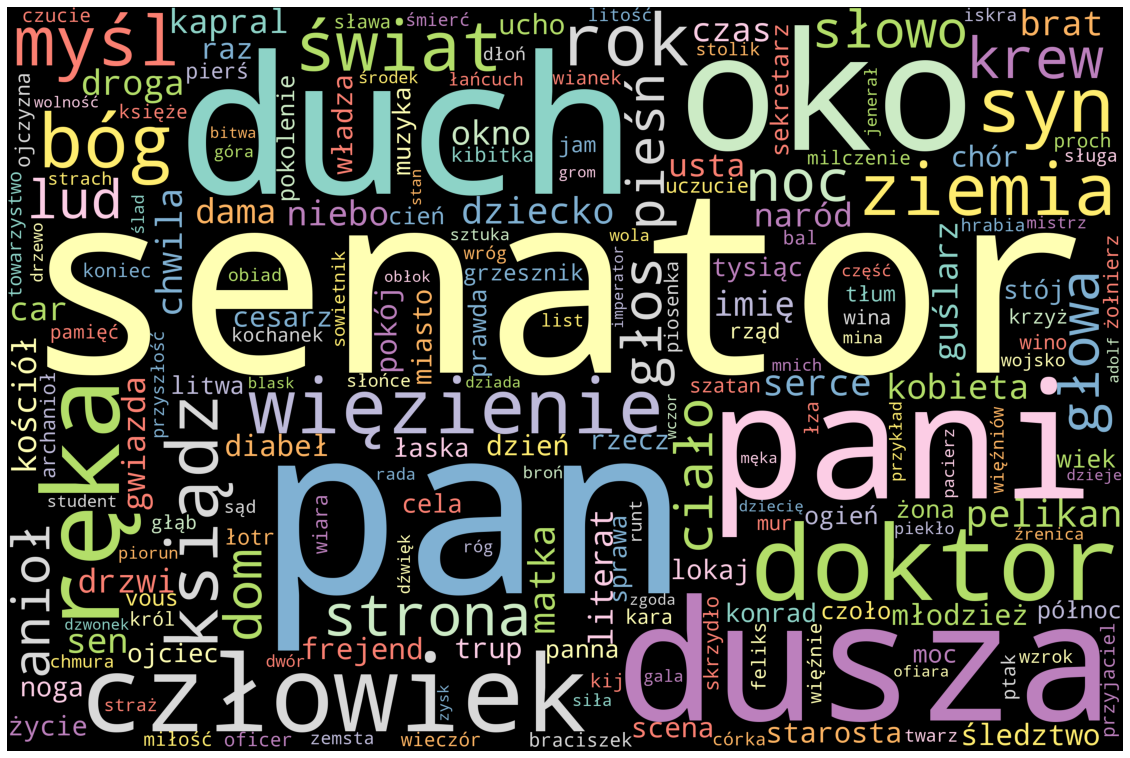

In [71]:
#bez macierzy tfidf
print(" Wizualizacja chmury tagów dla książki : Dziady III")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(korpus2[2])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Ogniem I Mieczem Tom I


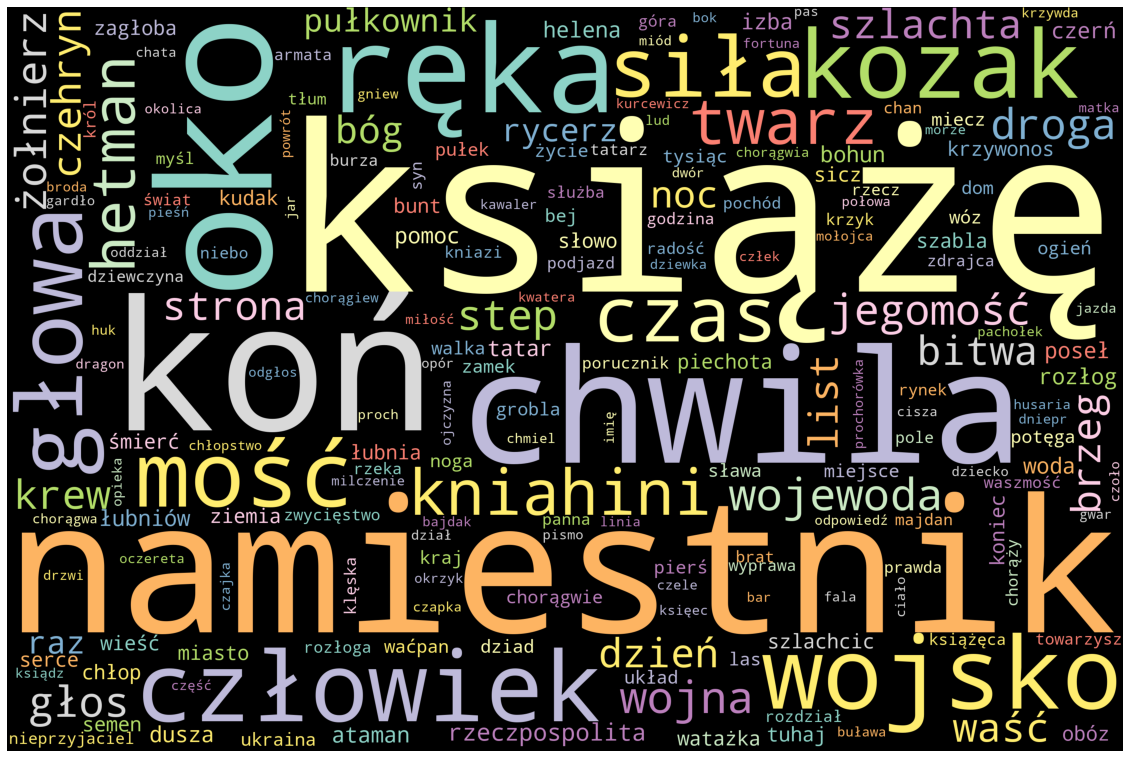

In [49]:
print(" Wizualizacja chmury tagów dla książki : Ogniem I Mieczem Tom I")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(top_words_korpus2[3])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Ogniem I Mieczem Tom I


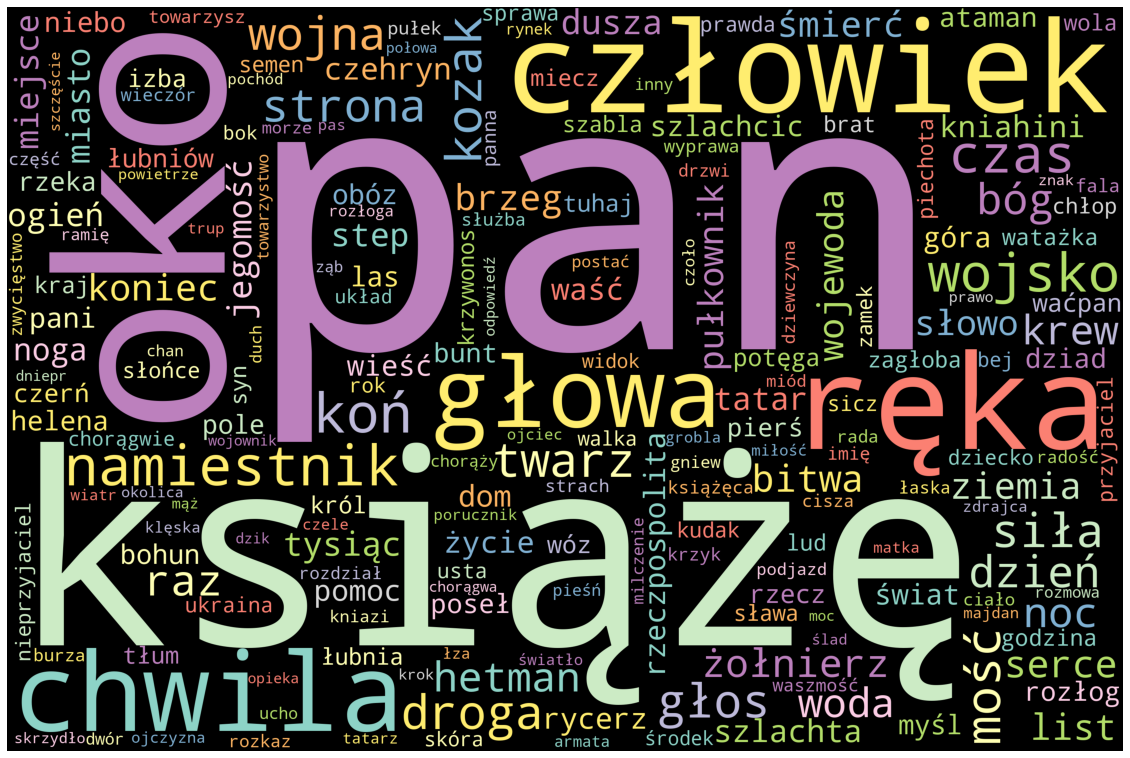

In [72]:
#bez macierzy tfidf
print(" Wizualizacja chmury tagów dla książki : Ogniem I Mieczem Tom I")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(korpus2[3])
plotCloud(wordcloud)

 Wizualizacja chmury tagów dla książki : Ogniem I Mieczem Tom II


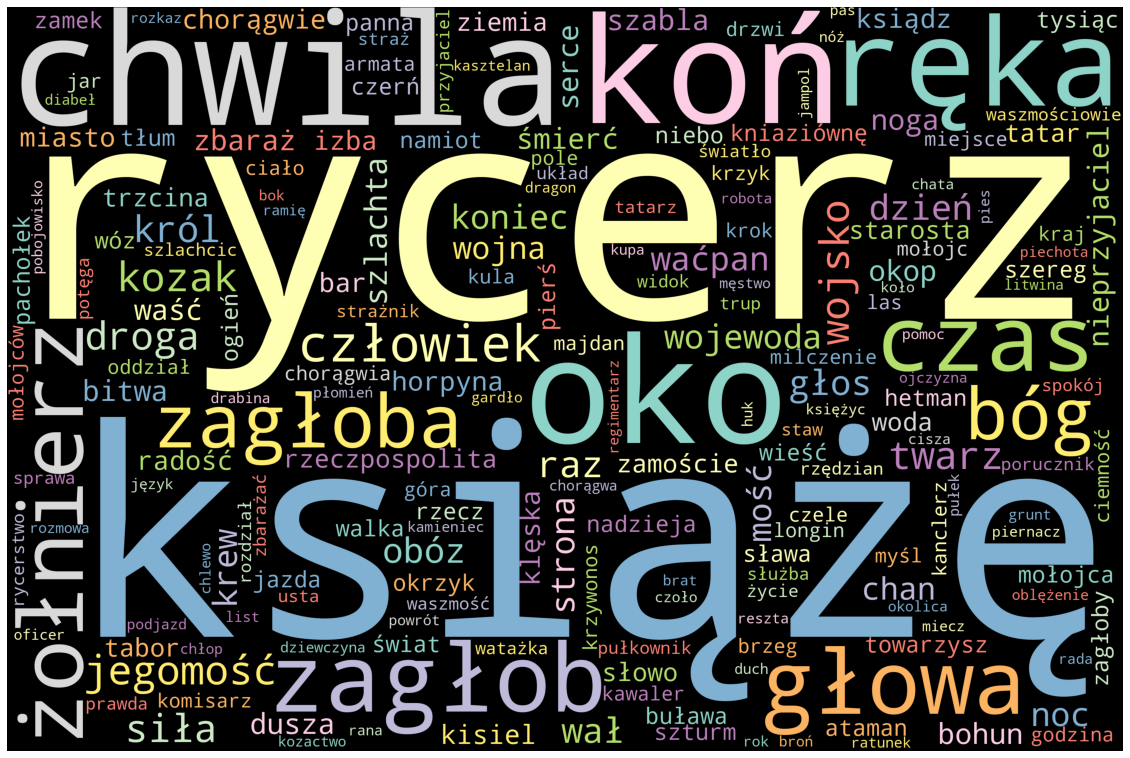

In [51]:
print(" Wizualizacja chmury tagów dla książki : Ogniem I Mieczem Tom II")
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(top_words_korpus2[4])
plotCloud(wordcloud)

## Punkt 5. Podać kilka przykładów  niejednoznaczności znaczeniowej występującej w tekstach oraz przyjęty sposób ich rozwiązania

Pierwszy sposób

In [52]:
temp_words = []
temp_words2 = []
niejednoznacznosc_dict ={}
for t in malyKsiaze_nlp:
   #print(t)
   if str(t) not in temp_words:
      temp_words.append(str(t))
      temp_words2.append(t)

   else:

     for i in temp_words2:
        if str(i.lemma_) == str(t.lemma_): # jeśli 2 słowa mają te same lematy
          if str(i.pos_) != str(t.pos_): # i jednocześnie stanowią inne części mowy
             if str(i.tag_) != str(t.tag_): # oraz inne klasy gramatyczne
               niejednoznacznosc_dict[i] = t # to zakładam, że są one innymi słowami (niejednoznaczne)
    

In [53]:
print(niejednoznacznosc_dict)

{tym: to, to: to, dorosłym: dorośli, dorosłemu: dorosły, było: są, bo: boa, czy: czy, był: są, byli: są, być: są, była: są, za: za, boa: bo, będzie: są, wiele: wiele, dorosłych: dorosłym, istnieją: istnienie, dorosłego: dorośli, niewielu: niewiele, będziesz: są, będę: są, mogą: może, mogli: może, możecie: może, mogę: może, i: i, by: by, mało: mało, były: są, tyle: tyle, co: co, czym: co, czego: co, istnienie: istnieje, dużo: więcej, jesteśmy: będzie, wszystkie: wszystkim, wszyscy: wszystkim, wszystkich: wszystkim, nie: nie, tylko: tylko, jest: było, są: było, jestem: było, około: około, sądzenia: sądzę, żebym: żebym, żebyś: żebym, posiadanie: posiadam, jesteś: było, istnieje: istnienie, jakby: jakby, wszystkim: wszystkie, móc: może, mógł: może, wiedzą: wiedział, byłam: byłem, niewiele: niewiele, lis: lisa, rozumienia: rozumiejąc, picia: pić, milczała: milczenia, będziemy: są, będą: są, więcej: więcej, tak: tak, znajdowały: znajdują, rysowania: rysować, rysowaniu: rysować, piję: picia, 

Koncepcja powyższego algorytmu jest następująca:
Jeżeli są wyrazy niejednoznaczne, to często ich forma podstawowa może być taka sama, natomiast założyłem, że najprosciej będzie znaleźć wyrazy niejednoznaczne szukając wyrazów mających tą samą formę podstawową, a inną klasę gramatyczną i inną część mowy. 
Tym sposobem udało się zebrać słownik wyrazów podejrzewanych o niejednoznaczność i wśród nich rzeczyiście są prawidłowe pary, na przykład:


*   wydały: wydania ( może być na przykład wydanie książki, w sensie tomu książki lub wydanie jako czynność np. wydanie posiłku )
*   pił: picia ( picie może oznaczać napój lub czynność samą w sobie )
*   lis: lisa (lisa może oznaczać zwierze lub może być imieniem )

Myślę, że nie jest to idealny algorytm, jednak niestety nie udało mi się wymyśleć lepszego.




Drugi sposób

In [54]:
# Zapisuję pod zmiennymi wszystkie rzeczowniki
def getNounsList(book):
  tab = []
  for t in book:
    if t.pos_ == 'NOUN':
      tab.append(t)
  return tab

malyKsiaze_nouns_no_lema = getNounsList(malyKsiaze_nlp)
dziady2_nouns_no_lema = getNounsList(dziady2_nlp)
dziady3_nouns_no_lema = getNounsList(dziady3_nlp)
ogniemIMieczemT1_nouns_no_lema = getNounsList(ogniemIMieczemT1_nlp)
ogniemIMieczemT2_nouns_no_lema = getNounsList(ogniemIMieczemT2_nlp)

In [55]:
# Tworzę korpus dokumentów ( [[rzeczowniki książki 1],[rzeczowniki książki2],...])
korpus_x = []
korpus_x.append(malyKsiaze_nouns_no_lema)
korpus_x.append(dziady2_nouns_no_lema)
korpus_x.append(dziady3_nouns_no_lema)
korpus_x.append(ogniemIMieczemT1_nouns_no_lema)
korpus_x.append(ogniemIMieczemT2_nouns_no_lema)

In [56]:
nouns_tab_test2 = [] # [ [lista rzeczowników w formie podstawowej książki1], [lista rzeczowników w formie podstawowej książki2], ...]
nouns_test2 = []
for book in korpus_x:
  for t in book:
      nouns_test2.append(t.lemma_)
  nouns_tab_test2.append(nouns_test2)
nouns_test2 = []

In [57]:
# zmiana formatu
korpus_test_2 = []
for noun in nouns_tab_test2:
  noun = ' '.join(noun)
  korpus_test_2.append(noun)

In [58]:
print("{0:15} {1:8} {2:6} {3:15}\n".format(".orth_", ".lemma_", ".tag_", ".pos_"))

for book in korpus_x :
  for t in book:
    if(t.orth_ != t.lemma_):
      print("{0:16} {1:16} {2:5} {3:5}".format(t.orth_, t.lemma_, t.tag_, t.pos_))

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
dziesiątki       dziesiątka       SUBST NOUN 
tysięcy          tysiąc           SUBST NOUN 
ludzi            człowiek         SUBST NOUN 
ataku            atak             SUBST NOUN 
dali             dal              SUBST NOUN 
machin           machina          SUBST NOUN 
wież             wieża            SUBST NOUN 
okopowi          okop             SUBST NOUN 
bokach           bok              SUBST NOUN 
skrzydeł         skrzydło         SUBST NOUN 
mosty            most             SUBST NOUN 
fosy             fos              SUBST NOUN 
szczyty          szczyt           SUBST NOUN 
wystrzałami      wystrzała        SUBST NOUN 
działek          działka          SUBST NOUN 
rusznic          rusznica         SUBST NOUN 
samopałów        samopał          SUBST NOUN 
wieże            wieża            SUBST NOUN 
głów             głowa            SUBST NOUN 
pułkownicy       pułkownik        SUBST NOUN 
ogniu          

Trzeci sposób

In [ ]:
# Przygotowanie środowiska, komendy linux
# instalacja Morfeusza 2
!wget -O - http://download.sgjp.pl/apt/sgjp.gpg.key|sudo apt-key add -
!sudo apt-add-repository http://download.sgjp.pl/apt/ubuntu
!sudo apt update
!sudo apt install morfeusz2
!sudo apt install python3-morfeusz2

In [60]:
import morfeusz2
morf = morfeusz2.Morfeusz()

In [ ]:
for book in korpus_test_2:
  analysis = morf.analyse(book)
  for interpretation in analysis:
    print(interpretation)

## Punkt 6. W wybranej lekturze znaleźć 5 rzeczowników występujących w formie podmiotów oraz pokazać z jakimi czasownikami się łączą w związku podmiotu z orzeczeniem.

In [63]:
nlp.add_pipe('sentencizer') # sentencizer jest po to, żeby móc z korpusu pobrać zdania

In [73]:
# pobrane (wyszczególnione) zostają zdania, następnie tworzona jest lista tych zdań i dalej jest wypisywana
# uwaga: czasem jako zdanie zrobi się kilka zdań, do analizy najlepiej wybrać pojedyncze
malyKsiaze_zad6 = nlp(malyKsiaze)
sentences = [sent for sent in malyKsiaze_zad6.sents]
#print(sentences)

In [74]:
#szukam zdań pojedynczych wypisując je
#print(sentences[26])
print(sentences[27])
print(sentences[28])
print(sentences[29])
#print(sentences[30])
#print(sentences[31])
print(sentences[32])
#print(sentences[33])
print(sentences[34])
#wybrano zdania o indeksach 27, 28, 29, 32, 34

Tym sposobem zarzuciłem w wieku sześciu lat wspaniałą karierę malarską.
Zniechęciło mnie niepowodzenie mojego rysunku numer 1 i rysunku numer 2.
Dorośli nigdy niczego sami nie potrafią zrozumieć i wciąż trzeba im coś objaśniać, co dla dzieci jest bardzo męczące.
Obleciałem nieomal cały świat.
Już na pierwszy rzut oka potrafiłem odróżnić Chiny od Arizony.


In [66]:
#tworzę listę zawierającą wszystkie 5 zdań, które będziemy analizować dalej
real_sentences = []
real_sentences.append(sentences[27])
real_sentences.append(sentences[28])
real_sentences.append(sentences[29])
real_sentences.append(sentences[32])
real_sentences.append(sentences[34])

In [68]:
from spacy import displacy

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

counter = 0
sent_doc = []

for sentence in real_sentences:
  if counter==5:
    break;
  sent_doc.append(sentence)
  for token in sentence:#sent_doc[counter]:
  # Print the token, dependency nature, head and all dependents of the token
    print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  displacy.render(sentence, style='dep', jupyter=True, options={'distance': 120})
  counter+=1

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Tym             | det      | sposobem        | []                  
sposobem        | iobj     | zarzuciłem      | [Tym]               
zarzuciłem      | ROOT     | zarzuciłem      | [sposobem, wieku, karierę, .]
w               | case     | wieku           | []                  
wieku           | obl      | zarzuciłem      | [w, lat]            
sześciu         | nummod   | lat             | []                  
lat             | nmod     | wieku           | [sześciu]           
wspaniałą       | amod     | karierę         | []                  
karierę         | obj      | zarzuciłem      | [wspaniałą, malarską]
malarską        | amod     | karierę         | []                  
.               | punct    | zarzuciłem      | []                  


Zniechęciło     | ROOT     | Zniechęciło     | [mnie, niepowodzenie, .]
mnie            | obj      | Zniechęciło     | []                  
niepowodzenie   | nsubj    | Zniechęciło     | [rysunku, numer]    
mojego          | det:poss | rysunku         | []                  
rysunku         | obj      | niepowodzenie   | [mojego]            
numer           | obj      | niepowodzenie   | [1, rysunku, numer] 
1               | amod     | numer           | []                  
i               | cc       | rysunku         | []                  
rysunku         | conj     | numer           | [i]                 
numer           | nmod     | numer           | [2]                 
2               | amod     | numer           | []                  
.               | punct    | Zniechęciło     | []                  


Dorośli         | nsubj    | potrafią        | []                  
nigdy           | advmod   | potrafią        | []                  
niczego         | det      | sami            | []                  
sami            | nsubj    | potrafią        | [niczego]           
nie             | advmod:neg | potrafią        | []                  
potrafią        | ROOT     | potrafią        | [Dorośli, nigdy, sami, nie, zrozumieć, trzeba, .]
zrozumieć       | xcomp    | potrafią        | []                  
i               | cc       | trzeba          | []                  
wciąż           | advmod   | trzeba          | []                  
trzeba          | conj     | potrafią        | [i, wciąż, objaśniać]
im              | iobj     | objaśniać       | []                  
coś             | obj      | objaśniać       | []                  
objaśniać       | xcomp    | trzeba          | [im, coś, męczące]  
,               | punct    | męczące         | []                  
co              

Obleciałem      | ROOT     | Obleciałem      | [nieomal, świat, .] 
nieomal         | advmod   | Obleciałem      | []                  
cały            | amod     | świat           | []                  
świat           | obj      | Obleciałem      | [cały]              
.               | punct    | Obleciałem      | []                  


Już             | advmod:emph | rzut            | []                  
na              | case     | rzut            | []                  
pierwszy        | amod     | rzut            | []                  
rzut            | obl      | potrafiłem      | [Już, na, pierwszy, oka]
oka             | nmod:arg | rzut            | []                  
potrafiłem      | ROOT     | potrafiłem      | [rzut, odróżnić, .] 
odróżnić        | xcomp    | potrafiłem      | [Chiny, Arizony]    
Chiny           | obj      | odróżnić        | []                  
od              | case     | Arizony         | []                  
Arizony         | obl      | odróżnić        | [od]                
.               | punct    | potrafiłem      | []                  


In [69]:
print("{:<15} | {:<8}".format('Podmiot','Orzeczenie'))
print ("-" * 30)

for sent in sent_doc:
  for tok in sent:
    if tok.dep_ == 'nsubj':
      print("{:<15} | {:<8}".format(tok.orth_,tok.head.orth_))

Podmiot         | Orzeczenie
------------------------------
niepowodzenie   | Zniechęciło
Dorośli         | potrafią
sami            | potrafią
co              | męczące 
